In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [3]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [4]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [107]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

In [70]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


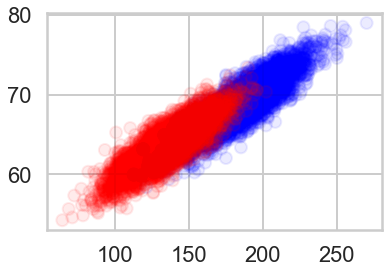

In [71]:
plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], alpha=0.08);

In [72]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    fold = KFold(nfold, shuffle=False, random_state=None)
    for train, test in fold.split(y):
        clf.fit(x[train], y[train]) 
        result += score_func(clf.predict(x[test]), y[test]) 
    return result / nfold

In [73]:
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)

In [74]:
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print (max_score, best_C)

0.9198666666666668 0.001


c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

In [75]:
clfl=LogisticRegression(C=best_C)
clfl.fit(Xlr, ylr)
ypred=clfl.predict(Xtestlr)
accuracy_score(ypred, ytestlr)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9188

In [76]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 {'C': 0.001},
 0.9198666666666667,
 {'mean_fit_time': array([0.0037817 , 0.00418563, 0.00398903, 0.00398908, 0.00398889,
         0.00418849]),
  'std_fit_time': array([7.53489028e-04, 7.43316047e-04, 1.78416128e-07, 2.43140197e-07,
         4.42200589e-07, 3.99255795e-04]),
  'mean_score_time': array([0.00039954, 0.00039902, 0.00019956, 0.00039902, 0.00039916,
         0.00039911]),
  'std_score_time': array([0.00048934, 0.0004887 , 0.00039911, 0.00048869, 0.00048887,
         0.00048881]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              d

In [77]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9188

In [78]:
##The ATM Camera example

In [79]:
data=np.load("data/imag.pix.npy")
y=np.load("data/imag.lbl.npy")
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

In [80]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

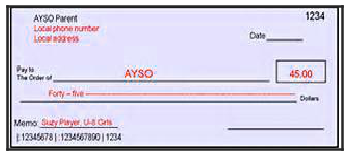

In [81]:
display_image(data[5])

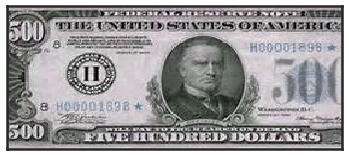

In [82]:
display_image(data[50])

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [84]:
print (pca.explained_variance_ratio_.sum())

0.9424022574162167


In [85]:
pca.explained_variance_ratio_*100

array([35.92596698,  6.29318801,  4.10778347,  3.11950952,  2.81695972,
        2.28831619,  2.10127948,  1.87404974,  1.73264631,  1.53023769,
        1.42159662,  1.31839381,  1.24701489,  1.16381727,  1.09958282,
        1.06073056,  1.00742988,  0.98023593,  0.96055595,  0.91534426,
        0.90184742,  0.85213196,  0.83673223,  0.7969128 ,  0.75488297,
        0.72497594,  0.70817802,  0.67960899,  0.66089612,  0.64769271,
        0.62731988,  0.59470668,  0.58298393,  0.57442653,  0.57275461,
        0.55241965,  0.53843731,  0.53313061,  0.51650253,  0.49333272,
        0.48590675,  0.47741578,  0.47173864,  0.45569168,  0.44351803,
        0.43929059,  0.43417928,  0.42685834,  0.42093948,  0.40911612,
        0.40502329,  0.39189584,  0.38771399,  0.37950951,  0.3782397 ,
        0.36060484,  0.35179199,  0.34129207,  0.33613374,  0.32885337])

In [86]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.343652,-2133.778334,-328.317760,-1065.239549,79.796225,-425.024912,622.554579,-2490.103765,-858.524777,-1072.483892,277.129218,-1116.627796,713.732750,-788.487732,414.305339,-195.424202,470.381660,-430.335009,-607.950474,-591.809666,-267.733697,-983.776436,951.280249,1040.428086,574.680226,-44.927318,-124.678267,-514.124014,547.085410,-634.007813,79.026993,-744.609038,1239.334914,-604.111086,-130.473292,524.096109,271.091480,-251.326618,50.581007,-456.508789,744.300900,622.894086,-429.686432,487.883109,-227.155183,-121.738838,265.993355,-581.075809,-550.016150,-480.573150,130.484773,390.071391,34.477664,-139.225328,-533.311453,142.257818,-368.592217,-1.016263,-411.811197
1,1,check,-22226.658684,-709.255487,-288.829291,-1300.635632,-792.092800,217.420360,1076.781060,-2115.068786,-875.446527,-1124.810920,-343.195600,-43.423550,548.134214,358.024740,-1761.759521,-372.734376,814.434051,293.050185,-941.750915,154.672556,-1124.683474,505.920303,-815.580223,714.086204,290.639824,-114.154368,820.958867,1140.188385,-364.376362,123.695154,-840.484337,577.238680,324.070095,162.650562,-672.317290,-670.120612,-110.435705,-201.854279,-139.676148,-375.570282,107.483457,-23.693924,705.840017,-0.270233,326.109900,16.467699,-40.344575,354.722752,1168.487888,281.014070,-483.175032,-127.890269,362.550648,-66.826784,729.342285,-298.892653,38.420345,-13.496220,-212.579538,-492.153319
2,1,check,-17364.260784,-4252.027146,793.795659,-1362.050233,-374.251250,3142.026032,2514.206639,1443.840705,-121.188914,-419.780350,-2083.062536,1717.943162,-723.812527,-1239.545474,-310.715339,-1061.042288,1385.900362,-801.301557,-2602.178341,-885.356080,3384.243052,-390.157615,-3416.135421,1338.594016,-4757.545704,1021.631259,2206.153097,-694.555912,1376.941886,-2150.771215,-627.161086,1669.817480,1793.111713,-3120.199500,-839.176238,2240.381832,-3054.308127,3112.691302,928.758261,234.252243,1703.093590,-3346.094039,3427.710981,1479.497482,1001.629136,810.934558,-703.638708,-1157.647020,-41.239188,-3154.372979,-2436.191508,-1838.647931,1238.738212,-1239.715988,-1872.178573,-1889.192056,-1002.490171,-1021.538115,-895.844292,1168.828408
3,1,check,-22847.256199,-900.592279,577.209138,-180.293963,-733.115162,-107.780652,1441.909152,-1069.731158,845.166746,-1389.879043,1471.506792,-723.631321,-578.640679,-256.635165,929.577492,169.613486,-302.764004,870.010265,-181.469695,1237.530092,551.396735,-175.117625,-315.763043,-358.017300,-922.077162,187.165438,1291.788295,58.026934,-237.070960,-452.349718,-180.039235,-29.858057,43.762764,776.403119,-211.303896,667.075912,491.880942,303.588940,107.395424,-386.019571,1478.257354,-683.331433,-865.186295,720.171477,287.406942,-575.138944,-683.323399,-665.092734,-726.380288,-1916.527327,283.358515,452.402053,-270.550475,230.298876,-261.757052,-281.233581,1257.674678,-204.557488,1293.506888,604.559439
4,1,check,-15868.672594,3259.490178,506.816135,-919.657681,2166.566722,-981.685292,-1669.657875,-391.536952,1735.179875,162.970897,-1626.721970,-555.763788,-863.882885,1718.868179,944.676631,-1132.231960,2140.940521,771.207036,-1091.390416,599.743309,-17.527238,85.338648,-511.708453,1122.673953,322.986887,-1253.099477,-741.559241,-682.189582,-153.521805,-931.030204,961.276818,-3578.150028,2128.864767,-3351.001452,-931.996967,-2129.022078,1898.987544,2159.285258,2562.424326,-455.396169,181.085236,1250.556987,1118.944266,-1275.558991,-404.628834,-1227.436039,516.706996,676.016573,3085.236782,1451.637262,-1002.684442,-1772.552761,-182.418112,-2570.991830,2157.674076,2594.215769,210.584445,-1234.510889,-1705.727631,-679.973891


In [87]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

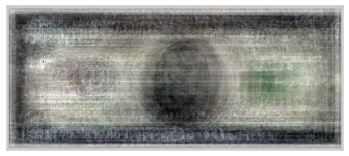

In [88]:
display_component(pca,0)

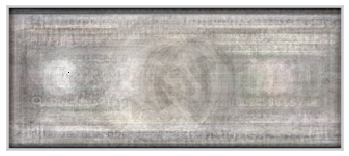

In [89]:
display_component(pca,1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


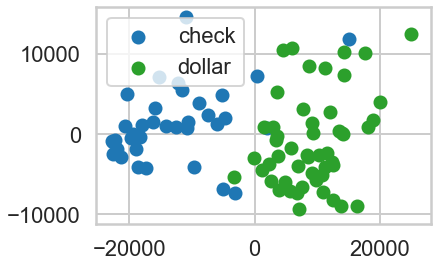

In [90]:
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print ("Accuracy on training data: %0.2f" % (training_accuracy))
        print ("Accuracy on test data:     %0.2f" % (test_accuracy))
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 1.00
Accuracy on test data:     0.89


(1, 1.0, 0.8857142857142857)

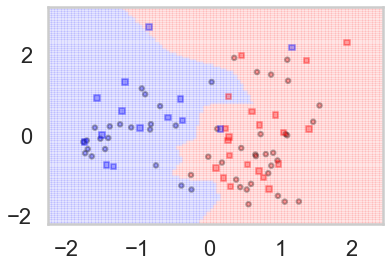

In [92]:
classify(Xs,ys,1)

Accuracy on training data: 0.60
Accuracy on test data:     0.57


(50, 0.5961538461538461, 0.5714285714285714)

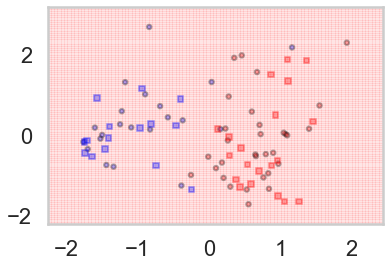

In [93]:
classify(Xs,ys,50)

In [94]:
fits={}
for k in np.arange(1,45,1):
    fits[k]=[]
    for i in range(200):
        fits[k].append(classify(Xs, ys,k, False))
nbrs=np.arange(1,45,1)
fmeanstr = np.array([1.-np.mean([t[1] for t in fits[e]]) for e in nbrs])
fmeanste = np.array([1.-np.mean([t[2] for t in fits[e]]) for e in nbrs])
fstdsstr = np.array([np.std([t[1] for t in fits[e]]) for e in nbrs])
fstdsste = np.array([np.std([t[2] for t in fits[e]]) for e in nbrs])

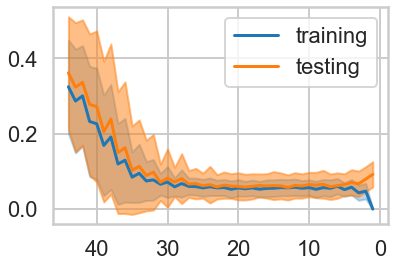

In [95]:
plt.gca().invert_xaxis()
plt.plot(nbrs, fmeanstr, color=c0, label="training");
plt.fill_between(nbrs, fmeanstr - fstdsstr, fmeanstr+fstdsstr, color=c0, alpha=0.3)
plt.plot(nbrs, fmeanste, color=c1, label="testing");
plt.fill_between(nbrs, fmeanste - fstdsste, fmeanste+fstdsste, color=c1, alpha=0.5)

plt.legend();

In [96]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print ("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [97]:
from sklearn.model_selection import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [98]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'n_neighbors': 3}
Accuracy on training data: 0.96
Accuracy on test data:     0.89


c:\program files (x86)\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


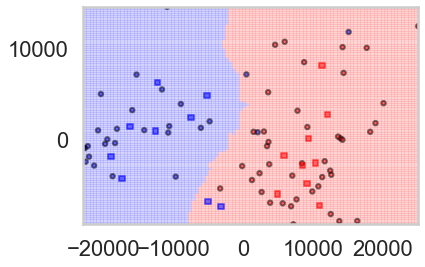

In [99]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[9, 0],
       [2, 7]], dtype=int64)

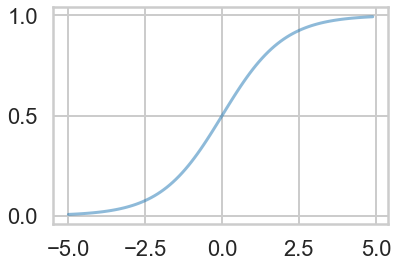

In [101]:
h = lambda z: 1./(1+np.exp(-z))
zs=np.arange(-5,5,0.1)
plt.plot(zs, h(zs), alpha=0.5);

In [102]:
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [103]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]}, dflog, ['Weight', 'Height'], 'Gender','Male')


BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.92
Accuracy on test data:     0.91


c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

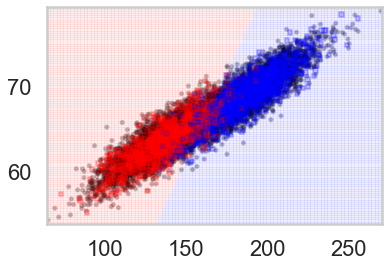

In [104]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, alpha=0.2);

In [66]:
clf_l.predict_proba(Xtest_l)

array([[0.99823967, 0.00176033],
       [0.63545382, 0.36454618],
       [0.93356992, 0.06643008],
       ...,
       [0.98404671, 0.01595329],
       [0.96069578, 0.03930422],
       [0.96803403, 0.03196597]])

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'axes'
  """
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'axes'
  


TypeError: clabel() got an unexpected keyword argument 'axes'

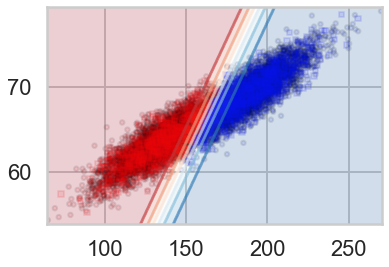

In [108]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain_l, Xtest_l, ytrain_l, ytest_l, clf_l, psize=20, alpha=0.1);